In [51]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv

Tree   = '..\hdr-bilder\Tree\Tree_00032.png'
Balls  = '..\hdr-bilder\Balls\Balls_00032.png'
StillLife = '..\hdr-bilder\StillLife\StillLife_01024.png'

constant = 1.3

In [63]:
def glatting(file, k):              
    orig_im = imageio.imread(file).astype(float)/255     #Originalbilde
    im = np.copy(orig_im)
    orig_gray_im =  gray.rgb2gray(file)
    gray_im =  gray.rgb2gray(file)
    
    im = im + .05 * np.random.randn(* np.shape(im))        #legger på tilfeldig støy
    gray_im = gray_im + .05 * np.random.randn(* np.shape(gray_im))        #legger på tilfeldig støy
    
    iteration = 30
    delta_t = 1 / iteration
    
    for i in range(iteration):
        laplace = (im[0:-2, 1:-1] +
            im[2:, 1:-1] +
            im[1:-1, 0:-2] +
            im[1:-1, 2:] -
            4 * im[1:-1, 1:-1])
        h = k*delta_t*(im[1:-1, 1:-1] - orig_im[1:-1, 1:-1])
        im[1:-1, 1:-1] += .25 * (laplace - h)
        im[:, 0] = im[:, 1]      # Neumann randbetingelse
        im[:, -1] = im[:, -2]    #
        im[0, :] = im[1, :]      #
        im[-1, :] = im[-2 , :]   #
        im[im < 0] = 0                                 # klipp til lovlige verdier
        im[im > 1] = 1
    
    for i in range(iteration):
        laplace = .25 * (gray_im[0:-2, 1:-1] +
            gray_im[2:, 1:-1] +
            gray_im[1:-1, 0:-2] +
            gray_im[1:-1, 2:] -
            4 * gray_im[1:-1, 1:-1])
        h = k*delta_t*(gray_im[1:-1, 1:-1] - orig_gray_im[1:-1, 1:-1])
        gray_im[1:-1, 1:-1] += .25 * (laplace - h)
        gray_im[:, 0] = gray_im[:, 1]      # Neumann randbetingelse
        gray_im[:, -1] = gray_im[:, -2]    #
        gray_im[0, :] = gray_im[1, :]      #
        gray_im[-1, :] = gray_im[-2 , :]   #
        gray_im[gray_im < 0] = 0                                 # klipp til lovlige verdier
        gray_im[gray_im > 1] = 1

    imv.view(orig_im, im, orig_gray_im, gray_im, "Glatting") 

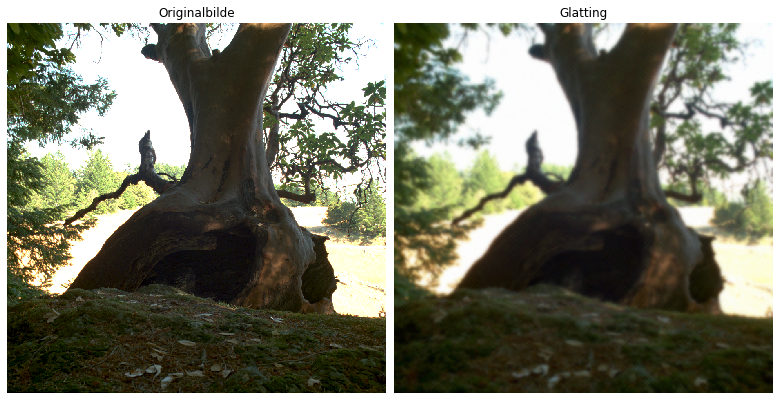

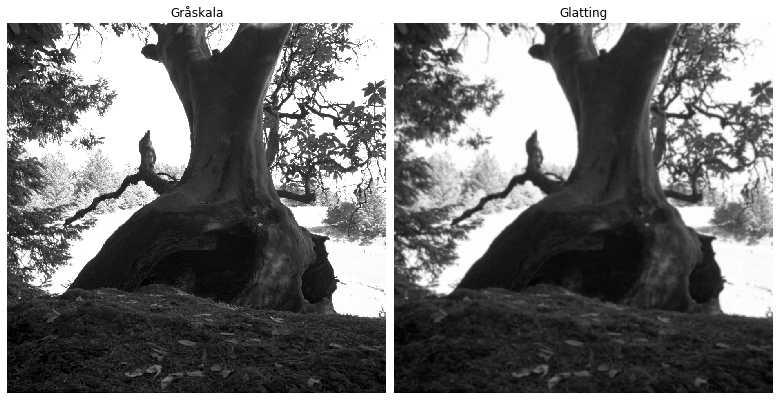

In [61]:
glatting(Tree, constant)

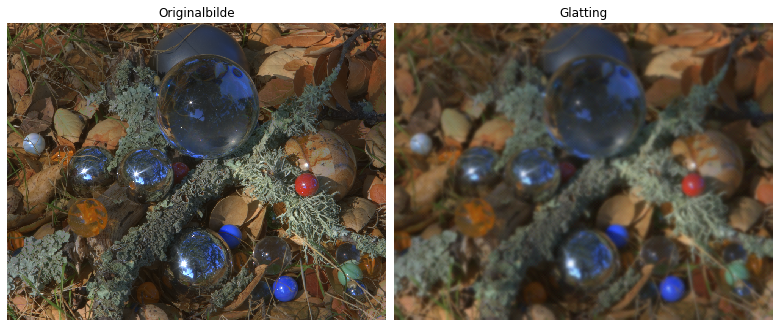

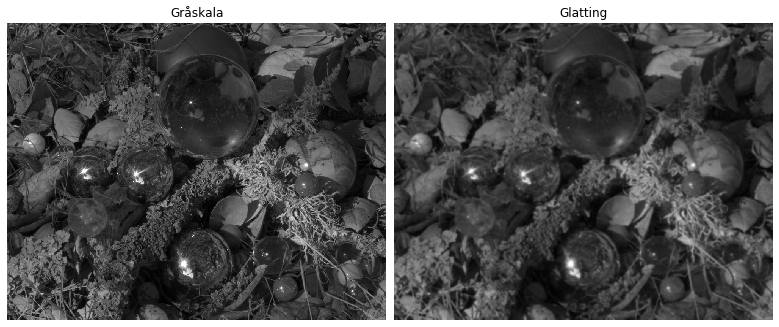

In [62]:
glatting(Balls, constant)